Configure path envirorment

In [1]:
import sys
import os
sys.path.append(os.getcwd()[:-4]) 

Import Libraries

In [2]:
import numpy as np
from examples.traveling_salesman import TravelingSalesman
from src.crossover.order_crossover import OrderCrossover
from src.mutation.position_mutation import PositionMutation
from src.selection.tournament_selection import TournamentSelection

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Defining Distance Matrix 

Cities | A | B | C | D | E
------- | -------- | -------- | -------- | -------- | --------
A | 0 | 2 | 7 | 1 | 5
B | 2 | 0 | 5 | 3 | 4
C | 7 | 5 | 0 | 6 | 8
D | 1 | 3 | 6 | 0 | 2
E | 5 | 4 | 8 | 2 | 0

In [3]:
# Load the traveling salesman problem - LAU15
# Acess: https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html
n_cities = 15
lines = [
    [0, 29, 82, 46, 68, 52, 72, 42, 51, 55, 29, 74, 23, 72, 46],
    [29, 0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11, 52, 21],
    [82, 55, 0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64, 31, 51],
    [46, 46, 68, 0, 82, 15, 72, 31, 62, 42, 21, 51, 51, 43, 64],
    [68, 42, 46, 82, 0, 74, 23, 52, 21, 46, 82, 58, 46, 65, 23],
    [52, 43, 55, 15, 74, 0, 61, 23, 55, 31, 33, 37, 51, 29, 59],
    [72, 43, 23, 72, 23, 61, 0, 42, 23, 31, 77, 37, 51, 46, 33],
    [42, 23, 43, 31, 52, 23, 42, 0, 33, 15, 37, 33, 33, 31, 37],
    [51, 23, 41, 62, 21, 55, 23, 33, 0, 29, 62, 46, 29, 51, 11],
    [55, 31, 29, 42, 46, 31, 31, 15, 29, 0, 51, 21, 41, 23, 37],
    [29, 41, 79, 21, 82, 33, 77, 37, 62, 51, 0, 65, 42, 59, 61],
    [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65, 0, 61, 11, 55],
    [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61, 0, 62, 23],
    [72, 52, 31, 43, 65, 29, 46, 31, 51, 23, 59, 11, 62, 0, 59],
    [46, 21, 51, 64, 23, 59, 33, 37, 11, 37, 61, 55, 23, 59, 0]
]

distance_matrix = np.array(lines)

In [4]:
params = {
    "n_individuals" : [20, 50, 100],
    "n_generations" : [25, 50, 100],
    "n_genes"       : [n_cities],
    "otimizer"      : np.argmin,
    "mutation_rate" : [0.01, 0.05, 0.1],
    "selection"     : [TournamentSelection()],
    "crossover"     : [OrderCrossover()],
    "mutation"      : [PositionMutation()],
}
kwargs = {
    "distance_matrix"  : distance_matrix,
}
best_fitness, best_params = TravelingSalesman().grid_search(**params, **kwargs)
print('Best Fitness:', best_fitness)
print('Best Params:', best_params)

Best Fitness: 296.4
Best Params: {'n_individuals': 100, 'n_genes': 15, 'n_generations': 50, 'otimizer': <function argmin at 0x7f4d441c3cf0>, 'mutation_rate': 0.1, 'selection': <src.selection.tournament_selection.TournamentSelection object at 0x7f4d01aca870>, 'crossover': <src.crossover.order_crossover.OrderCrossover object at 0x7f4d444596d0>, 'mutation': <src.mutation.position_mutation.PositionMutation object at 0x7f4d018a3ec0>}


Creating the genetic algorithm model

In [5]:
model = TravelingSalesman(
    n_individuals = best_params['n_individuals'],
    n_generations = best_params['n_generations'],
    n_genes = best_params['n_genes'],
    otimizer = best_params['otimizer'],
    mutation_rate = best_params['mutation_rate'],
    ** kwargs
)

model.set_selection(best_params['selection'])
model.set_crossover(best_params['crossover'])
model.set_mutation(best_params['mutation'])

Running the Optimization for Ten Steps

In [9]:
steps = 10
fitness_evolution = [] # Best fitness evolution for executions
history_individuals = [] # Mantain all the history individuals from last execution
for i in range(steps):
    best_individual = model.simulate()
    best_fitness += model.fitness([best_individual])[0]
    fitness_evolution.append([min(model.fitness(generation)) for generation in model.history_individuals])
    history_individuals = np.array(model.history_individuals)

fitness_evolution = np.array(fitness_evolution)
print('Individual:', best_individual)
print('Best result:', model.fitness([best_individual])[0])

Individual: [ 1 14  8  4  6  2 11 13  9  7  5  3 10  0 12]
Best result: 291.0


Visualizing the mean fitness and best fitness evolution for last execution

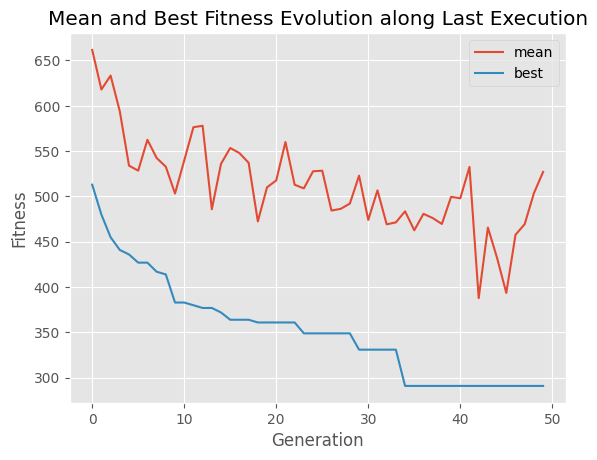

In [10]:
mean_fitness = np.array([np.mean(model.fitness(generation)) for generation in history_individuals])
max_fitness = np.array([np.min(model.fitness(generation)) for generation in history_individuals])

x = np.arange(mean_fitness.shape[0])
plt.plot(x,mean_fitness,label='mean')
plt.plot(x,max_fitness, label='best')
plt.title('Mean and Best Fitness Evolution along Last Execution')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.show()

Visualizing Best Fitness Evolution for each execution

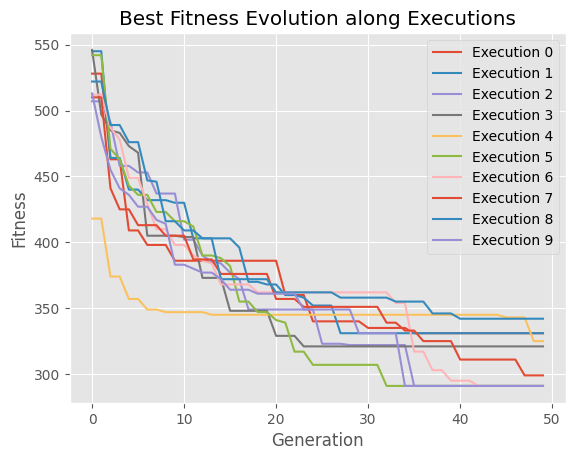

In [11]:
x = np.arange(fitness_evolution.shape[1])
for i,execution in enumerate(fitness_evolution):
    plt.plot(x, execution, label = f"Execution {i}")
plt.title('Best Fitness Evolution along Executions')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.show()